In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape


(891, 12)

In [5]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
100*df.isna().mean()


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
survival_count = df["Survived"].value_counts()
survival_rate = 100*survival_count/df.shape[0]
survival_data=pd.concat([survival_count,survival_rate],axis=1).reset_index()
survival_data.columns=['Survived','Count','percentage']
survival_data

,Survived,Count,percentage
0,0,549,61.616162
1,1,342,38.383838


Text(0.5, 1.0, 'percentage Survival of the Titanic Passengers')

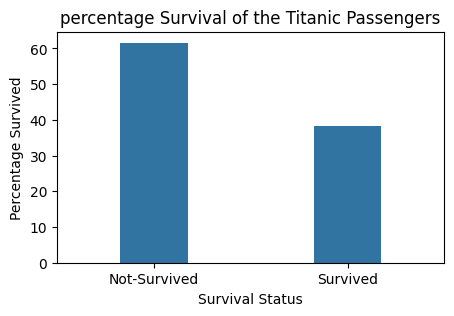

In [8]:
plt.figure(figsize=(5,3))
sns.barplot(survival_data,x=['Not-Survived','Survived'],y='percentage',
            width=0.35)
plt.ylabel('Percentage Survived')
plt.xlabel('Survival Status')
plt.title('percentage Survival of the Titanic Passengers')


In [9]:
def survival_acc_to_grp(df,colname):
    plt.figure(figsize=(5,3))
    survival_by_pclass=df[['Survived',colname]].value_counts().reset_index()
    sns.barplot(survival_by_pclass,x=colname,y='count',hue='Survived')
    plt.ylabel('Number of Survived')
    plt.title(f"Survived According to {colname}")


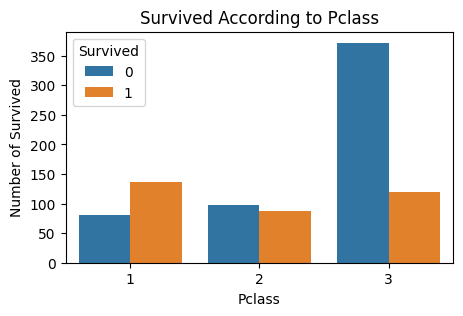

In [10]:
survival_acc_to_grp(df,'Pclass')

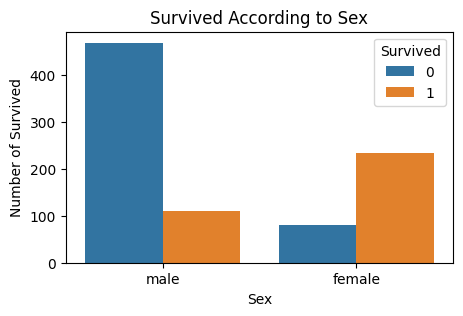

In [11]:
survival_acc_to_grp(df,'Sex')

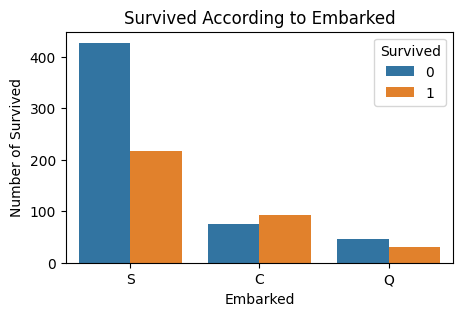

In [12]:
survival_acc_to_grp(df,'Embarked')

In [13]:
def vars_acc_to_surv(df, colname):
    plt.figure(figsize=(5,3))
    sns.kdeplot(df,x=colname,hue="Survived")
    plt.title(f'{colname} distribution according to the survival')


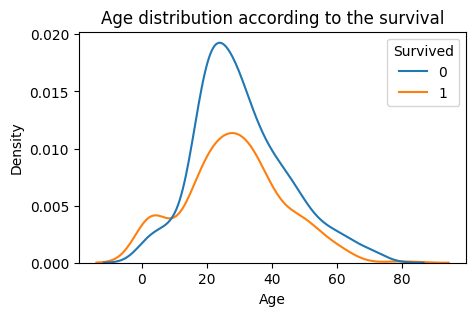

In [14]:
vars_acc_to_surv(df,'Age')


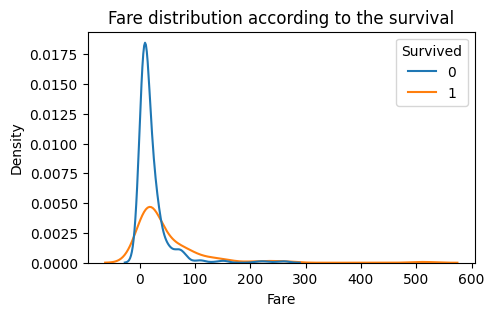

In [15]:
vars_acc_to_surv(df,'Fare')

In [16]:
def count_acc_to_surv(df,colname):
    plt.figure(figsize=(5,3))
    df1=df.groupby(['SibSp','Survived']).count()['PassengerId'].reset_index()
    sns.barplot(df1,x='SibSp',y='PassengerId',hue='Survived')
    plt.title(f'{colname}according to survival')
    plt.xlabel(f'{colname}')
    plt.ylabel('Count')

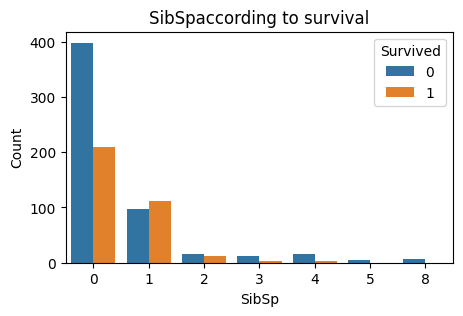

In [17]:

count_acc_to_surv(df,'SibSp')


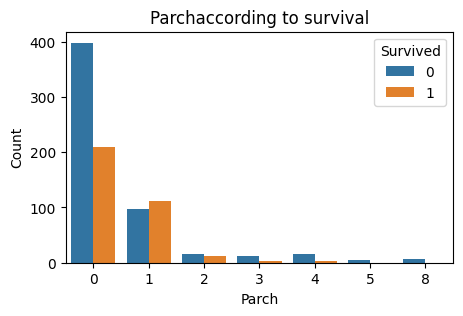

In [18]:
count_acc_to_surv(df,'Parch')


Text(0.5, 1.0, 'Comparison of the continuous variables')

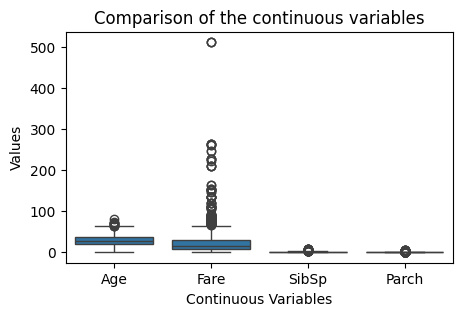

In [19]:
cont_vars=pd.melt(df,value_vars=['Age','Fare','SibSp','Parch'])
plt.figure(figsize=(5,3))
sns.boxplot(cont_vars,x='variable',y='value')
plt.xlabel('Continuous Variables')
plt.ylabel('Values')
plt.title('Comparison of the continuous variables')


In [20]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
df=df.dropna(subset='Fare')


In [22]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [23]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [24]:
df_survived=df[df['Survived']==1]
df_not_survived=df[df['Survived']==0]
df_survived_resampled=df_survived.sample(n=df_not_survived.shape[0],replace=True,random_state=101)
df_balanced=pd.concat([df_not_survived,df_survived_resampled]).sample(frac=1,random_state=26)
df_balanced

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
849,1,1,female,28.0,1,0,89.1042,C
735,0,3,male,28.5,0,0,16.1000,S
857,1,1,male,51.0,0,0,26.5500,S
336,0,1,male,29.0,1,0,66.6000,S
272,1,2,female,41.0,0,1,19.5000,S
...,...,...,...,...,...,...,...,...
354,0,3,male,28.0,0,0,7.2250,C
21,1,2,male,34.0,0,0,13.0000,S
430,1,1,male,28.0,0,0,26.5500,S
244,0,3,male,30.0,0,0,7.2250,C


In [25]:
df_balanced['Survived'].value_counts()

Survived
1    549
0    549
Name: count, dtype: int64

In [26]:
X=df_balanced.drop(['Survived'],axis=1)
y=df_balanced['Survived']


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1055)
print(f'''
X_train:{X_train.shape}
X_test:{X_test.shape}
y_train:{y_train.shape}
y_test:{y_test.shape}
''')



X_train:(878, 7)
X_test:(220, 7)
y_train:(878,)
y_test:(220,)



In [28]:
cont_cols=['Age','Fare']
disc_cols=['SibSp','Parch']
cat_cols=['Pclass','Sex','Embarked']
continuous_transformer=Pipeline(steps=[
    ('scaler',StandardScaler())])
discrete_transformer=Pipeline(steps=[
    ('scaler',MinMaxScaler())])
categorical_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(drop='first'))])

preprocessor=ColumnTransformer(
    transformers=[
        ('cont',continuous_transformer,cont_cols),
        ('disc',discrete_transformer,disc_cols),
        ('cat',categorical_transformer,cat_cols)])
model=Pipeline(steps=[('preprocessor',preprocessor),
                    ('classifier',LogisticRegression())])
model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cont', ...), ('disc', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [30]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.87      0.76        93
           1       0.88      0.69      0.77       127

    accuracy                           0.76       220
   macro avg       0.77      0.78      0.76       220
weighted avg       0.79      0.76      0.76       220



Text(33.22222222222222, 0.5, 'Predicted Value')

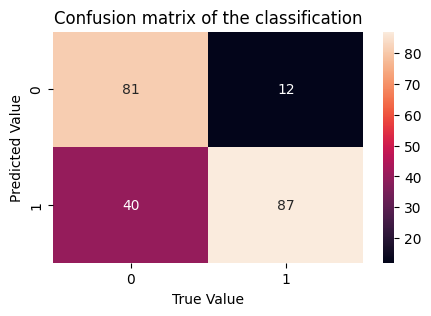

In [31]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.title('Confusion matrix of the classification')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [32]:
with open('./model_logistic.pkl','wb') as fp:
    pickle.dump(model,fp)
    

In [ ]:
#model Testing
new_passenger = pd.DataFrame([{
    'Age': 20,
    'Fare': 5.25,
    'SibSp': 1,
    'Parch': 0,
    'Pclass': 3,
    'Sex': 'female',
    'Embarked': 'S'
}])

res = model.predict(new_passenger)

if res[0] == 0:
    print("So Sorry! Not Survived")
else:
    print("🎉 Congratulations! Survived")


🎉 Congratulations! Survived
